# Wedding FOM Example
T-Lind

Uses a configuration file found in the samples directory to compute the optimal policy for the wedding example.

In [8]:
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt

from ptcr2.fom import FOM

config_file = 'samples/wedding_fom.json'
# parse file name
file_name = config_file.split('/')[-1].split('.')[0]

with open(config_file) as f:
    spec = json.loads(f.read())


In [9]:
load_from_file = input("Load from file? (y/n): ")

Computes the optimal policy. Prints out the time taken to compute the optimal policy as well as the configuration file used.

In [10]:
if load_from_file != 'y':
    wedding_fom = FOM()
    start = timer()
    wedding_fom.compute_optimal_policy(spec)
    end = timer()

    print('Time elapsed to compute optimal policy: ', end - start)

Formatting checks succeeded.

            Transition Matrix            
┏━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┓
┃   ┃ I   ┃ E   ┃ B   ┃ C   ┃ D   ┃ S   ┃
┡━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━┩
│ I │ 0.0 │ 0.1 │ 0.3 │ 0.1 │ 0.2 │ 0.3 │
│ E │ 0.0 │ 0.1 │ 0.2 │ 0.1 │ 0.3 │ 0.3 │
│ B │ 0.0 │ 0.2 │ 0.1 │ 0.1 │ 0.3 │ 0.3 │
│ C │ 0.0 │ 0.1 │ 0.2 │ 0.2 │ 0.3 │ 0.2 │
│ D │ 0.0 │ 0.2 │ 0.3 │ 0.1 │ 0.1 │ 0.3 │
│ S │ 0.0 │ 0.4 │ 0.2 │ 0.2 │ 0.2 │ 0.0 │
└───┴─────┴─────┴─────┴─────┴─────┴─────┘

        Initial Distribution         
┏━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┳━━━━━┓
┃ I   ┃ E   ┃ B   ┃ C   ┃ D   ┃ S   ┃
┡━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━╇━━━━━┩
│ 0.0 │ 0.1 │ 0.3 │ 0.2 │ 0.2 │ 0.2 │
└─────┴─────┴─────┴─────┴─────┴─────┘

         Cost Matrix         
┏━━━┳━━━┳━━━┳━━━┳━━━┳━━━┳━━━┓
┃   ┃ I ┃ E ┃ B ┃ C ┃ D ┃ S ┃
┡━━━╇━━━╇━━━╇━━━╇━━━╇━━━╇━━━┩
│ I │ 0 │ 1 │ 2 │ 3 │ 4 │ 5 │
│ E │ 1 │ 0 │ 1 │ 2 │ 3 │ 4 │
│ B │ 2 │ 1 │ 0 │ 1 │ 2 │ 3 │
│ C │ 3 │ 2 │ 1 │ 0 │ 1 │ 2 │
│ D │ 4 │ 3 │ 2 │ 1 │ 0 │ 1 │
│ S │ 5 │ 4 │ 3 │ 2 │ 1 │ 0 │
└───┴───┴───┴───┴───┴───┴───┘

Alphabet 
┏━━━━━━━┓
┃ Items ┃
┡━━━━━━━┩
│ s1    │
│ e1    │
│ d1    │
│ d3    │
│ b1    │
│ s2    │
│ d23   │
│ s3    │
│ c3    │
│ c2    │
│ b3    │
│ c1    │
│ e2    │
│ b2    │
│ d2    │
│ e3    │
│ d12   │
└───────┘

Single initial state 0:
[[('d1', 'd2'), 'd12']]

Single initial state 1:
[[('d2', 'd3'), 'd23']]

Adding v0 =  9_I_I_I
Unreachable state have been recognized
Start checking transitions to remove
Number of transitions: 2587213
End checking transitions to remove
Start removing unreachable transitions
End removing unreachable transitions
Start removing unreachable states
End removing unreachable states
Start reindexing states
End reindexing states
Number of unreachable states removed = 0
Number of unreachable transitions removed = 0
Time elapsed to compute optimal policy:  93.35017970000001


Saving the model that was generated to a file. This will allow for faster loading in the future.

In [11]:
if load_from_file != 'y':
    fom_save_file_name = wedding_fom.save()
    print('Model saved to: ', fom_save_file_name)

Model saved to:  saves/ptcr_model_20240407-131257.pkl


Loads the model from the file that was saved. This is useful for when you want to run simulations on the model without having to recompute the optimal policy.

In [13]:
if load_from_file == 'y':
    fom_save_file_name = 'saves/ptcr_model_20240407-125823.pkl'
    is_file = input("Is this the correct file? (y/n): ")
    if is_file == 'n':
        fom_save_file_name = input("Enter the correct file name: ")
    wedding_fom = FOM.load(fom_save_file_name)

Plots the training runs of the general algorithm. This can be helpful to determine how various factors might affect the training process.

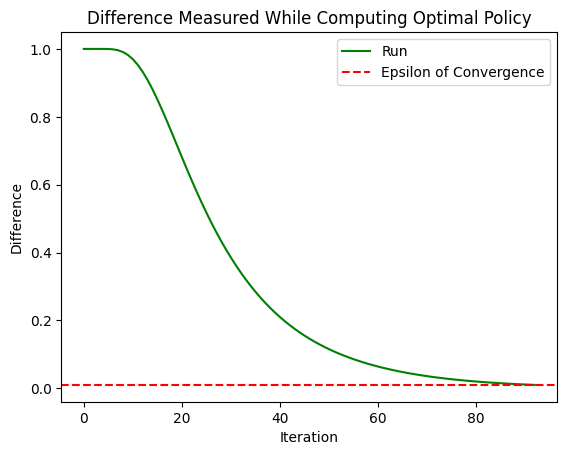

In [14]:
plt.title('Difference Measured While Computing Optimal Policy')
plt.xlabel('Iteration')
plt.ylabel('Difference')
plt.plot(wedding_fom.computed_policy['diff_tracker'], 'g', label='Run')
plt.axhline(wedding_fom.epsilon, linestyle='--', color='r', label='Epsilon of Convergence')
plt.legend()

Prints the result of one simulation run for both the general and greedy algorithm. This can be used to compare how much better our general algorithm is.

In [16]:
# Example run
results = wedding_fom.simulate_general_and_greedy_algorithms()  # Spec not needed since we're computing optimal policy separately

print(results)

{'general_algorithm': {'steps': 13, 'story': 'd2s3d12s3s3', 'total_cost': 11}, 'greedy_algorithm': {'steps': 38, 'story': 's3d2s3s3d12', 'total_cost': 10}}


In [18]:
from tqdm import tqdm

# Now, simulate the algorithms across 1000 runs
n_runs = 100_000

general_steps = []
greedy_steps = []

general_costs = []
greedy_costs = []

for i in tqdm(range(n_runs)):
    results = wedding_fom.simulate_general_and_greedy_algorithms()
    general_steps.append(results['general_algorithm']['steps'])
    greedy_steps.append(results['greedy_algorithm']['steps'])
    
    general_costs.append(results['general_algorithm']['total_cost'])
    greedy_costs.append(results['greedy_algorithm']['total_cost'])

100%|██████████| 1000/1000 [00:03<00:00, 253.95it/s]


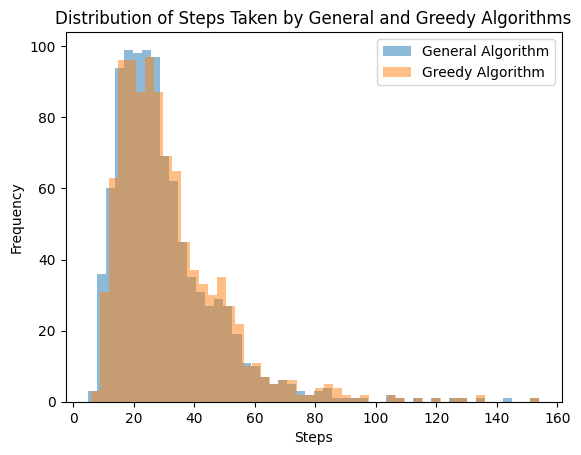

In [19]:
# Plot the two histograms, with general/greedy distributions in different colors
plt.hist(general_steps, bins=50, alpha=0.5, label='General Algorithm')
plt.hist(greedy_steps, bins=50, alpha=0.5, label='Greedy Algorithm')
plt.legend()
plt.title('Distribution of Steps Taken by General and Greedy Algorithms')
plt.xlabel('Steps')
plt.ylabel('Frequency')
plt.show()

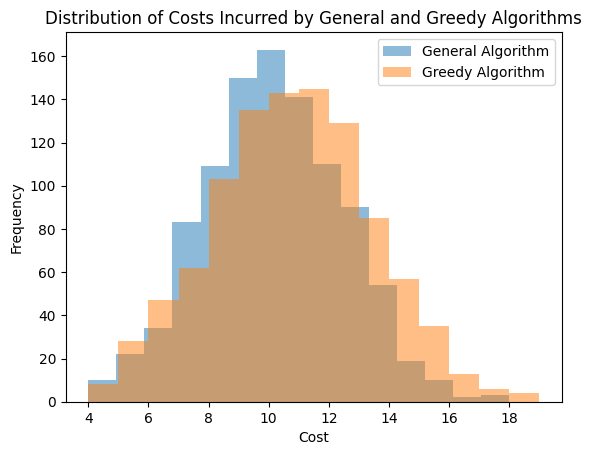

In [22]:
# Plot the two histograms, with general/greedy distributions in different colors
plt.hist(general_costs, bins=15, alpha=0.5, label='General Algorithm')
plt.hist(greedy_costs, bins=15, alpha=0.5, label='Greedy Algorithm')
plt.legend()
plt.title('Distribution of Costs Incurred by General and Greedy Algorithms')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.show()